In [1]:
import math
import numpy as np
import pandas as pd
import scipy.optimize as optim
import matplotlib.pyplot as plt

In [2]:
# Import the data
data = pd.read_csv('C://Users//fiona//Documents//indo_cov3.csv', sep=',')
data = data['cum_case']
data = data.reset_index(drop=False)
data.columns = ['Timestep', 'Total Cases']
data.head(10)

,Timestep,Total Cases
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,0
9,9,0


In [3]:
# Define funcion with the coefficients to estimate
def my_logistic(t, a, b, c):
    return c / (1 + a * np.exp(-b*t))

In [4]:
# Randomly initialize the coefficients
p0 = np.random.exponential(size=3)
p0

array([0.35799944, 0.23224284, 0.14777759])

In [5]:
# Set min bound 0 on all coefficients, and set different max bounds for each coefficient
bounds = (0, [100000., 3., 1000000000.])

In [6]:
# Convert pd.Series to np.Array and use Scipy's curve fit to find the best Nonlinear Least Squares coefficients
x = np.array(data['Timestep']) + 1
y = np.array(data['Total Cases'])

(a,b,c),cov = optim.curve_fit(my_logistic, x, y, bounds=bounds, p0=p0)

In [7]:
# Show the coefficients
a,b,c

(850.4272930450558, 0.053095482941224875, 48642.46225943789)

In [8]:
# Redefine the function with the new a, b and c
def my_logistic(t):
    return c / (1 + a * np.exp(-b*t))

In [9]:
z = np.arange(365)+1

Text(0, 0.5, 'Infections')

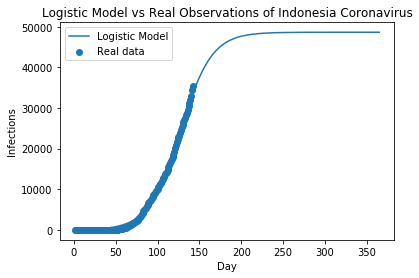

In [10]:
plt.scatter(x, y)
plt.plot(z, my_logistic(z))
plt.title('Logistic Model vs Real Observations of Indonesia Coronavirus')
plt.legend([ 'Logistic Model', 'Real data'])
plt.xlabel('Day')
plt.ylabel('Infections')

In [11]:
def my_inv_logistic(t):
    return np.log((c/t-1)/a)/-b

In [13]:
my_inv_logistic(48000)

208.29242947346563

Compute the moment of fastest growth

In [14]:
# The time step at which the growth is fastest
t_fastest = np.log(a) / b
t_fastest

127.04920545391028

In [15]:
# First way to find the y of the fastest growth moment
y_fastest = c / 2
y_fastest

24321.231129718944